In [12]:
%matplotlib inline

In [22]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn import neighbors, datasets

In [14]:
iris_dataset=load_iris()
print(iris_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [15]:
print(iris_dataset["DESCR"][:193])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre


In [23]:
X = iris_dataset["data"][:,:2]
y = iris_dataset.target

In [20]:
h=.02
x1_min, x1_max = X[:,0].min() - 0.2, X[:,0].max() + 0.2
x2_min, x2_max = X[:,1].min() - 0.2, X[:,1].max() + 0.2
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
rgb = [
    [255,238,255],
    [219,238,244],
    [228,228,228]
]
rgb = np.array(rgb)/255
cmap_light = ListedColormap(rgb)
cmap_bold = [[255, 51, 0],[0, 153, 255],[138, 138, 138]]
cmap_bold = np.array(cmap_bold)/255

In [42]:
k_neighbors=4
clf = neighbors.KNeighborsClassifier(k_neighbors)
clf.fit(X,y)

KNeighborsClassifier(n_neighbors=4)

In [43]:
q = np.c_[xx1.ravel(), xx2.ravel()]
y_predict = clf.predict(q)
y_predict = y_predict.reshape(xx1.shape)

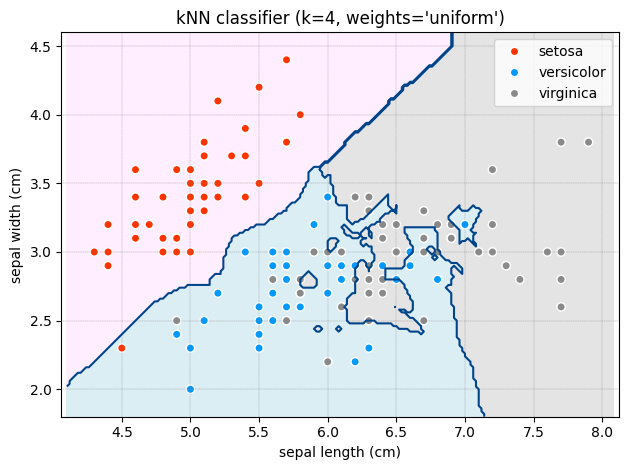

In [44]:
fig, ax = plt.subplots()
plt.contourf(xx1, xx2, y_predict, cmap=cmap_light)
# decision border
plt.contour(xx1, xx2, y_predict, levels=[0,1,2], colors=np.array([0, 68, 138])/255.)

sns.scatterplot(x=X[:,0], y=X[:,1], hue=iris_dataset.target_names[y], palette=cmap_bold.tolist(), 
                alpha=1.0, linewidth=1, edgecolor=[1,1,1])
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title("kNN classifier (k=%i, weights='uniform')" % (k_neighbors))
plt.xlabel(iris_dataset.feature_names[0])
plt.ylabel(iris_dataset.feature_names[1])
ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])
plt.tight_layout()
plt.axis('equal')
plt.show()